# Air Quality Analyis of an Office Space
By: Sandijs Vasilevskis [Email](sandijs.vasilevskis@gmail.com)

For: MOBISTYLE Project
[LINK](https://www.mobistyle-project.eu/en/mobistyle)
[Documentation](https://data-analysis-mobistyle.readthedocs.io/en/latest/)
[GitHub](https://github.com/SVGoogle/Data-Analysis-MOBISTYLE)


## Table of Contents
- [Introduction](#intro)
- [Data Wrangling](#wrangling)
- [Exploratory Data Analysis](#eda)
- [Summary](#summary)

<a id='intro'></a>
# Introduction


> This dataset contains of time series data with almost two year long indoor air quality meausurements of an office space in building of University of Ljublana (UL) in Slovenia, Europe.

## Plotting environment setup
Choosing different colors to represent:
* MOBISTYLE and BASELINE monitoring periods
* Indoor air quality comfort category ranges

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style(style='whitegrid', 
              rc={'figure.figsize': (11.7,8.27), 'xtick.major.size': 12, 'ytick.major.size': 12,
             'font.size': 14, 'axes.titlesize': 14, 'axes.labelsize': 14})

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
c:\programdata\anaconda3\envs\udacity\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


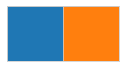

In [108]:
# Colors for plots
current_pallete =  sns.color_palette()
pallete = sns.color_palette().as_hex()

# Hex codes for BASELINE and MOBISTYLE colors
color_BL = '#1f77b4'
color_MS = '#ff7f0e'
color_other = '#2ca02c'
color_out = '#7f7f7f'
color_missing = 'lightgrey'

# Create dictionary pallete for Monitoring period
pal = dict(MOBISTYLE=color_MS, BASELINE=color_BL)

# Plot Colors for BASELINE and MOBISTYLE
sns.palplot([color_BL, color_MS])

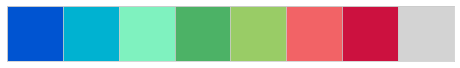

In [3]:
# Set bins and labels for Indoor environmental parameters
# The bin ranges ar based on an European building design standard DS/EN 15251:2007
bins_TEMP, bins_RH = [-10000, 19, 20, 21, 23, 24, 25, 10000], [-10000, 20, 25, 30, 50, 60, 70, 10000]
bins_CO2, bins_VOC = [-10000, 750, 900, 1200, 10000], [-10000, 40, 80, 100, 10000]

labels_T_RH = ['Cat -IV','Cat -III', 'Cat -II','Cat I', 'Cat +II','Cat +III','Cat +IV']
labels_CO2_VOC = ['Cat I', 'Cat II', 'Cat III', 'Cat IV']

# RGB codes for Comfort category colors
cmap_T_RH = [(0, .33, .82), (0, .7, .82), (.5, .95, .75), (.3, .7, .4), (.6, .8, .4), (.95, .39, .4), (.8, .07, .25), 'lightgrey']
cmap_CO2_VOC = [(.3, .7, .4), (.6, .8, .4), (.95, .39, .4), (.8, .07, .25), 'lightgrey']

# Plot diverging color pallete for Temperature and relative humidity categories
# Grey color for the missing data
sns.palplot(cmap_T_RH)

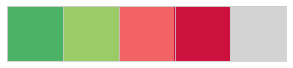

In [5]:
# Plot color pallete for CO2 and VOC level categories
# Grey color for the missing data
sns.palplot(cmap_CO2_VOC)

<a id='wrangling'></a>
# Data Wrangling

Before exploratory data analysis preliminary data wrangling was performed, see `'data_exploration.ipynb'` for further details.

In this chapter the dataset is loaded and its variables are described in order to motivate data exploration goals.

## Load Office Air Quality and Outdoor Climate Data

In [6]:
# Assign categorical data types before reading CSV file
dtypes = {
    'Monitoring_Period': 'category',
    'Season': 'category',
    'Category_TEMP': 'category',
    'Category_RH': 'category',
    'Category_CO2': 'category',
    'Category_VOC': 'category',
}

# read CSV file
df = (pd.read_csv('./Files/office_air_quality_data.csv',                    
                    parse_dates=True,
                    dtype=dtypes,
                    index_col='Timestamp')
       )

### What is the structure of the dataset?

Dataset contains **indoor and outdoor air parameter measurements**, window opening state and data on if the employees are present at the office, temperature setpoint regulation, heating and cooling valve operation.

Almost **2 year time series** data with 15 minutes observation intervals.

This data can further be divided into two monitoring periods, denominated as:
* `'BASELINE'` - First year of the monitoring to get reference data on the specific office space (with no interventions).
* `'MOBISTYLE'` - Second year of the monitoring, when employees are given a mobile app and sensors with LED lights (signaling a bad air quality in the office room) are installed. 


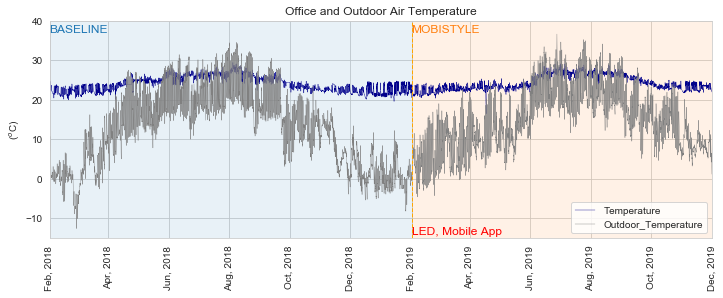

In [7]:
fig, ax = plt.subplots(figsize=(11.87, 4), sharex=True)

df.loc[:, ['Temperature', 'Outdoor_Temperature']].plot(title='Office and Outdoor Air Temperature', color=['darkblue', 'grey'],
                                                       linewidth=.4, ax=ax)
ax.axvline(x='02-01-2019', color='orange', linestyle='--', linewidth=1)
ax.fill_between(df.loc['02-01-2019':, :].index.values, -15, 40, facecolor=color_MS, alpha=0.1)
ax.fill_between(df.loc[:'02-01-2019', :].index.values, -15, 40, facecolor=color_BL, alpha=0.1)
ax.text(x='02-01-2019', y=-14, s='LED, Mobile App', color='red', size=12);
ax.text(x='02-01-2019', y=37, s='MOBISTYLE', color=color_MS, size=12);
ax.text(x='02-01-2018', y=37, s='BASELINE', color=color_BL, size=12);
ax.set(ylim=(-15,40), xticks=pd.date_range(start='2018-02-1', periods=12, freq='2MS'), xlabel='', ylabel='($^o$C)');
ax.set_xticklabels(pd.date_range(start='2018-02-1', periods=12, freq='2MS').strftime('%b, %Y'), rotation=90);

* BASELINE and MOBISTYLE monitoring periods are 12 months and 10 months long, respectively.
* Outdoor temperature differences between year 2018 and 2019 can be observed.
* Summmer and winter indoor air temperature fluctuations for each monitoring period can be observed. Due to the fact that the building is mechanically conditioned and has different HVAC system set-point values for each season.



### What kind of variable types are present?

**Continuous variables**
* `Indoor air parameters` like Temperature, Relative Humidity(RH), Carbon Dioxide (CO2) and Volatile Organic Compunds (VOC) levels
* `Outdoor air parameters` like Temperature, RH, Global radiation, Diffuse radiation

**Categorical Variables**
* `Season`: Heating or Cooling season of the year
* `Monitoring period`: BASELINE and MOBISTYLE
* `Room status`: 0 - unoccupied room, 1 - occupied room
* `Window state`: 0 - closed window, 1 - open window
* `Window state change`: 1 - opening of the window, 0 - no change,-1 is closing of the window


* `Comfort categories`: Indoor Air Quality (IAQ) of the Temperature, RH, CO2, VOC are labeled within specific paremeter ranges based on an European building design standard DS/EN 15251:2007 (see the Plotting setup section above for more details)
    - Temperature and RH are divided into **7 categories**
    - CO2 and VOC levels are divided into **4 categories**
    - Category I is the best IAQ comfort category 
    - **Category II** is the accepted level that it is aimed for in the office design and operation stage

In [8]:
# Variable dtypes
# Note: Due to np.nan values Room status, Window state and change are represent as float type
df.dtypes

Room_Status             float64
Window_State            float64
Window_State_Change     float64
CO2                     float64
RH                      float64
VOC                     float64
Temperature             float64
Monitoring_Period      category
Season                 category
Category_TEMP          category
Category_RH            category
Category_CO2           category
Category_VOC           category
Outdoor_Temperature     float64
Outdoor_RH              float64
Global_radiation        float64
Diffuse_radiation       float64
dtype: object

### What is the research question?
> **The alternative hypothesis for this project is that the employee use of mobile app and installing sensors with LED lights (that signalize high CO2 levels) would improve the air quality in the office, and would also urge the employees to open the windows more often and keep windows open for a longer period of time than before.**

### What is/are the main feature(s) of interest in your dataset?

Main interest of this dataset is to investigate if during the second monitoring period, denominated as `'MOBISTYLE'` the:
1. **Indoor Air Quality** (IAQ) parameters like Temperature, Relative Humidity, Carbon Dioxide and Volatile Organic Compound levels have improved, namely more time in Comfort Category I and **Category II**


2. **Window use** of the office has increased, namely if employees open the windows more frequently and **keep windows open** for a longer period of time compared to the 'BASELINE'

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Comparison of IAQ parameter distribution between both monitoring periods. Estimate indoor air parameter correlation with outdoor climate measurements. It is important to compare the outdoor climate difference between `'MOBISTYLE'` and `'BASELINE'`, because one measurement year could have been warmer/or colder than the other and thus have an impact to the data comparison. Also take into account the seasonality of the monitoring data by dividing the data into - Heating and Cooling seasons.

> Dataset constains 15 minutes values including weekends and night time. Therefore, before conducting the anlaysis, the dataset must be filtered for the time only when the employees are present in the office in order to account properly for the indoor climate parameters during working hours.

In [85]:
# Filter the data, exclude the time outsied working hours
data = df.query('Room_Status == 1')

# Verify that all values are equal to 1 (Office room occupied)
assert data['Room_Status'].all() == 1

# Dataset was reduced by almost 2/3 after filtering
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21248 entries, 2018-02-01 08:15:00 to 2019-11-29 17:15:00
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Room_Status          21248 non-null  float64 
 1   Window_State         21248 non-null  float64 
 2   Window_State_Change  21243 non-null  float64 
 3   CO2                  18211 non-null  float64 
 4   RH                   18211 non-null  float64 
 5   VOC                  18211 non-null  float64 
 6   Temperature          21248 non-null  float64 
 7   Monitoring_Period    21248 non-null  category
 8   Season               21248 non-null  category
 9   Category_TEMP        21248 non-null  category
 10  Category_RH          18211 non-null  category
 11  Category_CO2         18211 non-null  category
 12  Category_VOC         18211 non-null  category
 13  Outdoor_Temperature  21248 non-null  float64 
 14  Outdoor_RH           21248 non-null

<a id='eda'></a>
# Exploratory Data Analysis

The main purpose of this project is to compare if there are any air quality improvements during the `MOBISTYLE` monitoring periods.

It may be hard to evaluate the differences by comparing raw 15 minute values by plotting yearly temperature changes as the data flcutuates a lot, thus the dataset must be compared at larger time scales.

The further investigation of the air quality parameters will be performed by increasing the timestep from original 15 minutes to monthly, then to seasonal (heating, cooling) comparison, and in the end to whole monitoring period `MOBISTYLE` vs `BASELINE` will be compared.

## Univariate Exploration
### Invesigate Monitoring Period differences
> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [27]:
# Setup the same bin size for the office temperature
bins_T = np.arange(16, 30, .5)

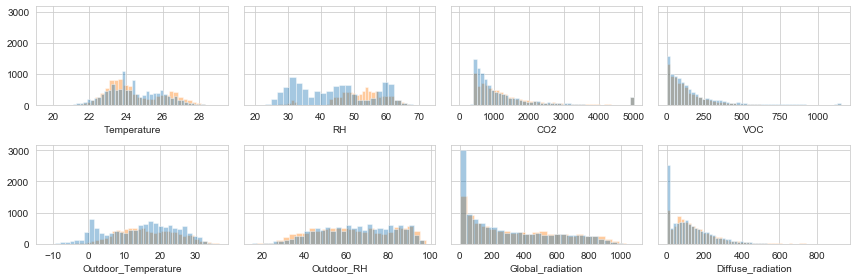

In [92]:
fig, axs = plt.subplots(2,4, figsize=(12, 4), sharey=True)
(ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8) = axs
kws = dict(kde=False, hist=True, kde_kws={'shade': True})

for period, color in pal.items():
    df_plot = data.query(f'Monitoring_Period == "%s"'% period);
    
    # Indoor
    sns.distplot(df_plot['Temperature'], **kws, color=color, ax=ax1);
    sns.distplot(df_plot['RH'], **kws, color=color, ax=ax2);
    sns.distplot(df_plot['CO2'], **kws, color=color, ax=ax3);
    sns.distplot(df_plot['VOC'], **kws, color=color, ax=ax4);
    # Outdoor
    sns.distplot(df_plot['Outdoor_Temperature'], **kws, color=color, ax=ax5);
    sns.distplot(df_plot['Outdoor_RH'], **kws, color=color, ax=ax6);
    sns.distplot(df_plot['Global_radiation'], **kws, color=color, ax=ax7);
    sns.distplot(df_plot['Diffuse_radiation'], **kws, color=color, ax=ax8);  

plt.tight_layout()   

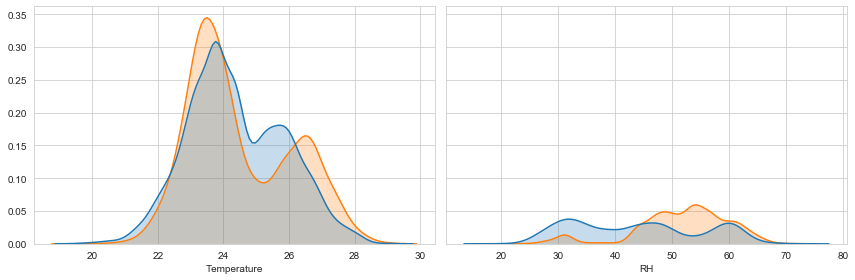

In [106]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 4), sharey=True)
kws = dict(kde=True, hist=False, kde_kws={'shade': True})

for period, color in pal.items():
    df_plot = data.query(f'Monitoring_Period == "%s"'% period);
    sns.distplot(df_plot['Temperature'], **kws, color=color, bins=np.arange(16, 30, .5), ax=ax1);
    sns.distplot(df_plot['RH'], **kws, color=color, bins=np.arange(0, 100, 5), ax=ax2);    

plt.tight_layout()  

From kernel density plots and histograms two clear peaks for the office temperature can be observed. This indicates clear seasonal differences for parameters like Temperature and also to some extent for the RH. CO2 and VOC levels don't have such distributions.

## Investigate Seasonal differences
The data at first level is grouped by the Monitoring period:
* `'MOBISTYLE'` 
* `'BASELINE'`

Afterwards it is further grouped into summer and winter periods, or as denoted here for:
* `'HEATING'`
* `'COOLING'`

This is important because air parameters like temperature, relative humidity are depend on the season of the year. 

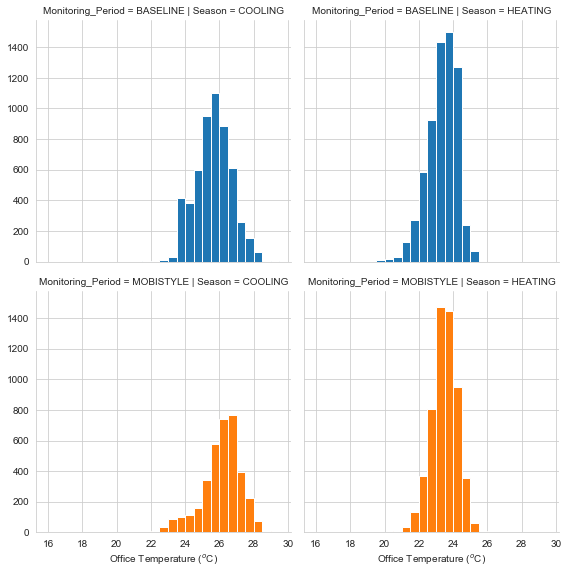

In [25]:

g = sns.FacetGrid(data, col='Season', row='Monitoring_Period', hue='Monitoring_Period',
                  height=4, palette=pal)
g = (g.map(plt.hist, 'Temperature', bins=bins_T)     
    .set_xlabels('Office Temperature ($^o$C)'))

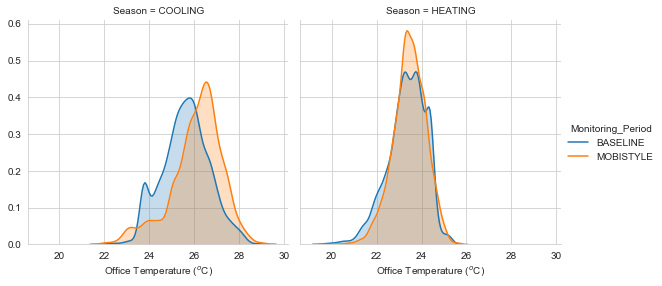

In [27]:
# Create Kernel Density plots without histograms to overlay the distributions
g = sns.FacetGrid(data, col='Season', hue='Monitoring_Period',
                  height=4, palette=pal)
g = (g.map(sns.distplot, 'Temperature', bins=bins, 
           kde=True, hist=False, kde_kws={'shade': True})
     .add_legend()
    .set_xlabels('Office Temperature ($^o$C)'))

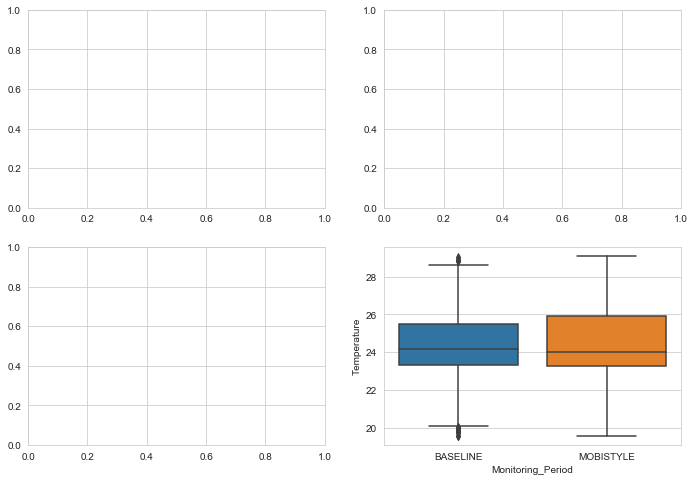

In [70]:
fig, ax = plt.subplots(2,2, figsize=(11.7, 8))

sns.boxplot(data=data, y='Temperature', x='Monitoring_Period')

     
   

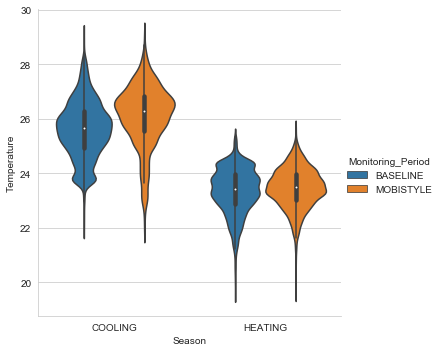

In [37]:
g = sns.catplot(data=data, x='Season', y='Temperature', hue='Monitoring_Period', kind='violin')

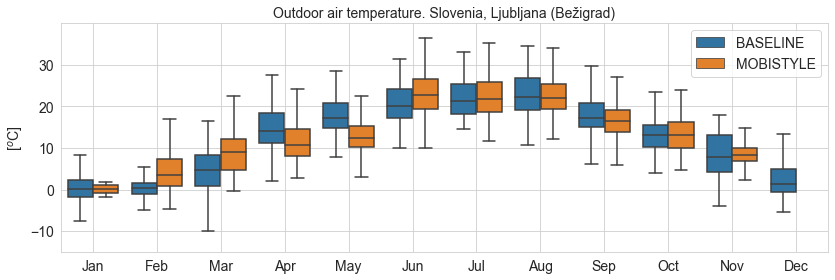

In [21]:
fig, ax = plt.subplots(figsize=(11.7, 4))

sns.boxplot(data=data, x=data.index.month, y='Outdoor_Temperature', hue='Monitoring_Period', showfliers=False, palette=[color_BL, color_MS], ax=ax)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14)
ax.xaxis.grid(True)
        
ax.set_title('Outdoor air temperature. Slovenia, Ljubljana (Bežigrad)', fontsize=14)
ax.set_ylabel('[$^o$C]', fontsize=14)
ax.set_xlabel('', fontsize=14)
ax.set_xticklabels(pd.date_range(start='2018-1-1', periods=12, freq='MS').strftime('%b'), rotation=0)
ax.set(yticks=[-10, 0, 10, 20, 30], ylim=(-15,40))

fig.tight_layout()

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

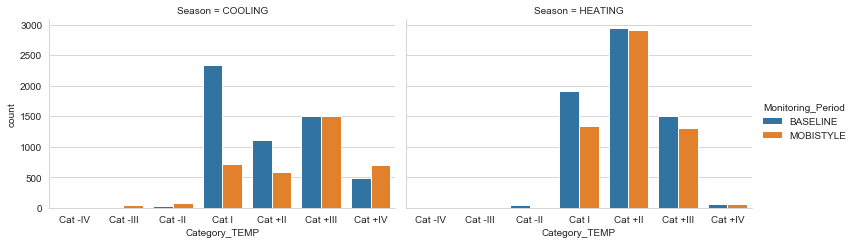

In [57]:
g = sns.catplot(x='Category_TEMP', hue='Monitoring_Period', col='Season',
                data=data, kind='count', order=labels_T_RH,
                height=3.5, aspect=1.5);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

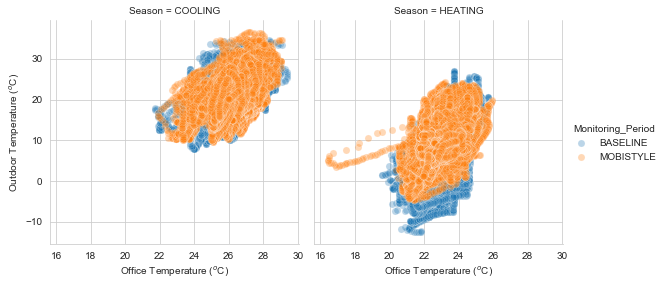

In [87]:
kws = dict(s=50, linewidth=.5, edgecolor="w", alpha=.3)
pal = dict(MOBISTYLE=color_MS, BASELINE=color_BL)

g = sns.FacetGrid(data, col='Season', hue='Monitoring_Period',
                  height=4, palette=pal)
g = (g.map(plt.scatter, 'Temperature', 'Outdoor_Temperature', **kws)
     .add_legend()
.set_axis_labels('Office Temperature ($^o$C)', 'Outdoor Temperature ($^o$C)')
    )

#### Outdoor vs Indoor Air Temperature

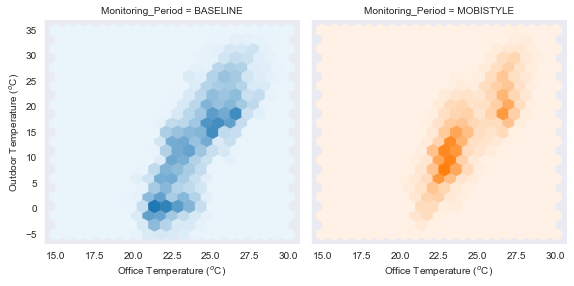

In [101]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=20, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(data, hue='Monitoring_Period', col='Monitoring_Period', height=4)
g = (g.map(hexbin, 'Temperature', 'Outdoor_Temperature', extent=[15, 30, -5, 35])
     .set_axis_labels('Office Temperature ($^o$C)', 'Outdoor Temperature ($^o$C)'));

#### Outdoor vs Indoor Air Relative Humidity

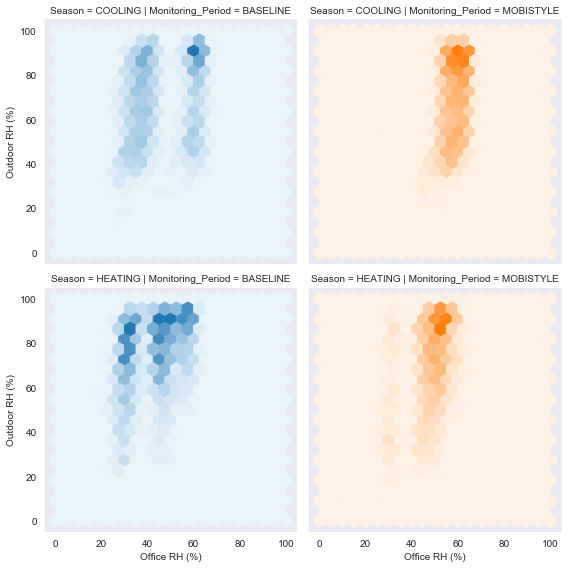

In [106]:
with sns.axes_style("dark"):
    g = sns.FacetGrid(data, hue='Monitoring_Period', col='Monitoring_Period', row='Season', height=4)
g = (g.map(hexbin, 'RH', 'Outdoor_RH', extent=[0, 100, 0, 100])
     .set_axis_labels('Office RH (%)', 'Outdoor RH (%)'));

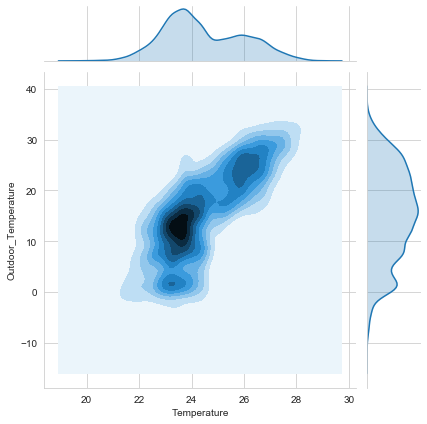

In [24]:
sns.jointplot(x='Temperature', y='Outdoor_Temperature', data=data, kind="kde");

### Correlation matrix
Calculate Spearmann's Correlation coefficient between all continuous numeric variables.

In [111]:
data.iloc[:, 3:].corr()

,CO2,RH,VOC,Temperature,Outdoor_Temperature,Outdoor_RH,Global_radiation,Diffuse_radiation
CO2,1.000000,0.214591,0.921807,0.264890,0.226443,-0.124775,0.034892,0.035399
RH,0.214591,1.000000,0.052002,0.421363,0.477518,0.205990,0.018175,-0.002949
VOC,0.921807,0.052002,1.000000,0.251732,0.223692,-0.138230,0.049796,0.059348
Temperature,0.264890,0.421363,0.251732,1.000000,0.804415,-0.195721,0.253029,0.199949
Outdoor_Temperature,0.226443,0.477518,0.223692,0.804415,1.000000,-0.416137,0.485381,0.353144
Outdoor_RH,-0.124775,0.205990,-0.138230,-0.195721,-0.416137,1.000000,-0.581361,-0.394195
Global_radiation,0.034892,0.018175,0.049796,0.253029,0.485381,-0.581361,1.000000,0.720280
Diffuse_radiation,0.035399,-0.002949,0.059348,0.199949,0.353144,-0.394195,0.720280,1.000000


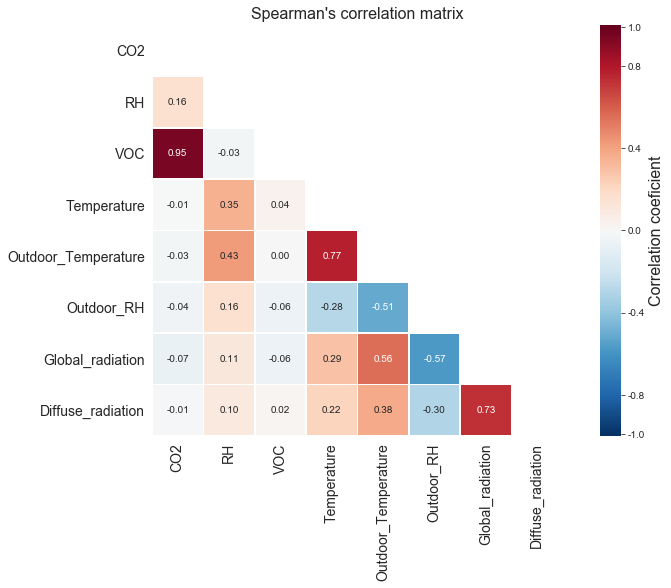

In [21]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))

mask = np.zeros_like(data.iloc[:, 3:].corr(method='spearman'))
mask[np.triu_indices_from(mask)] = True

hm = sns.heatmap(data.iloc[:, 3:].corr(method='spearman'), square=True,
                 cmap='RdBu_r', linewidths=.5, annot=True, fmt='.2f',
                 mask=mask, vmax=1., vmin=-1., ax=ax)

hm.figure.axes[-1].set_ylabel('Correlation coeficient', size=16)
hm.tick_params(labelsize=16)
hm.set_title("Spearman's correlation matrix", fontsize=16)

cbar = hm.collections[0].colorbar
cbar.set_ticks([-0.99, -0.8, -0.4, 0, 0.4, 0.8, .99])
cbar.set_ticklabels(['-1.0', '-0.8', '-0.4','0.0', '0.4', '0.8', '1.0' ])

ax.tick_params(axis='x', labelsize=14, rotation=90)
ax.tick_params(axis='y', labelsize=14, rotation=0)

plt.tight_layout()

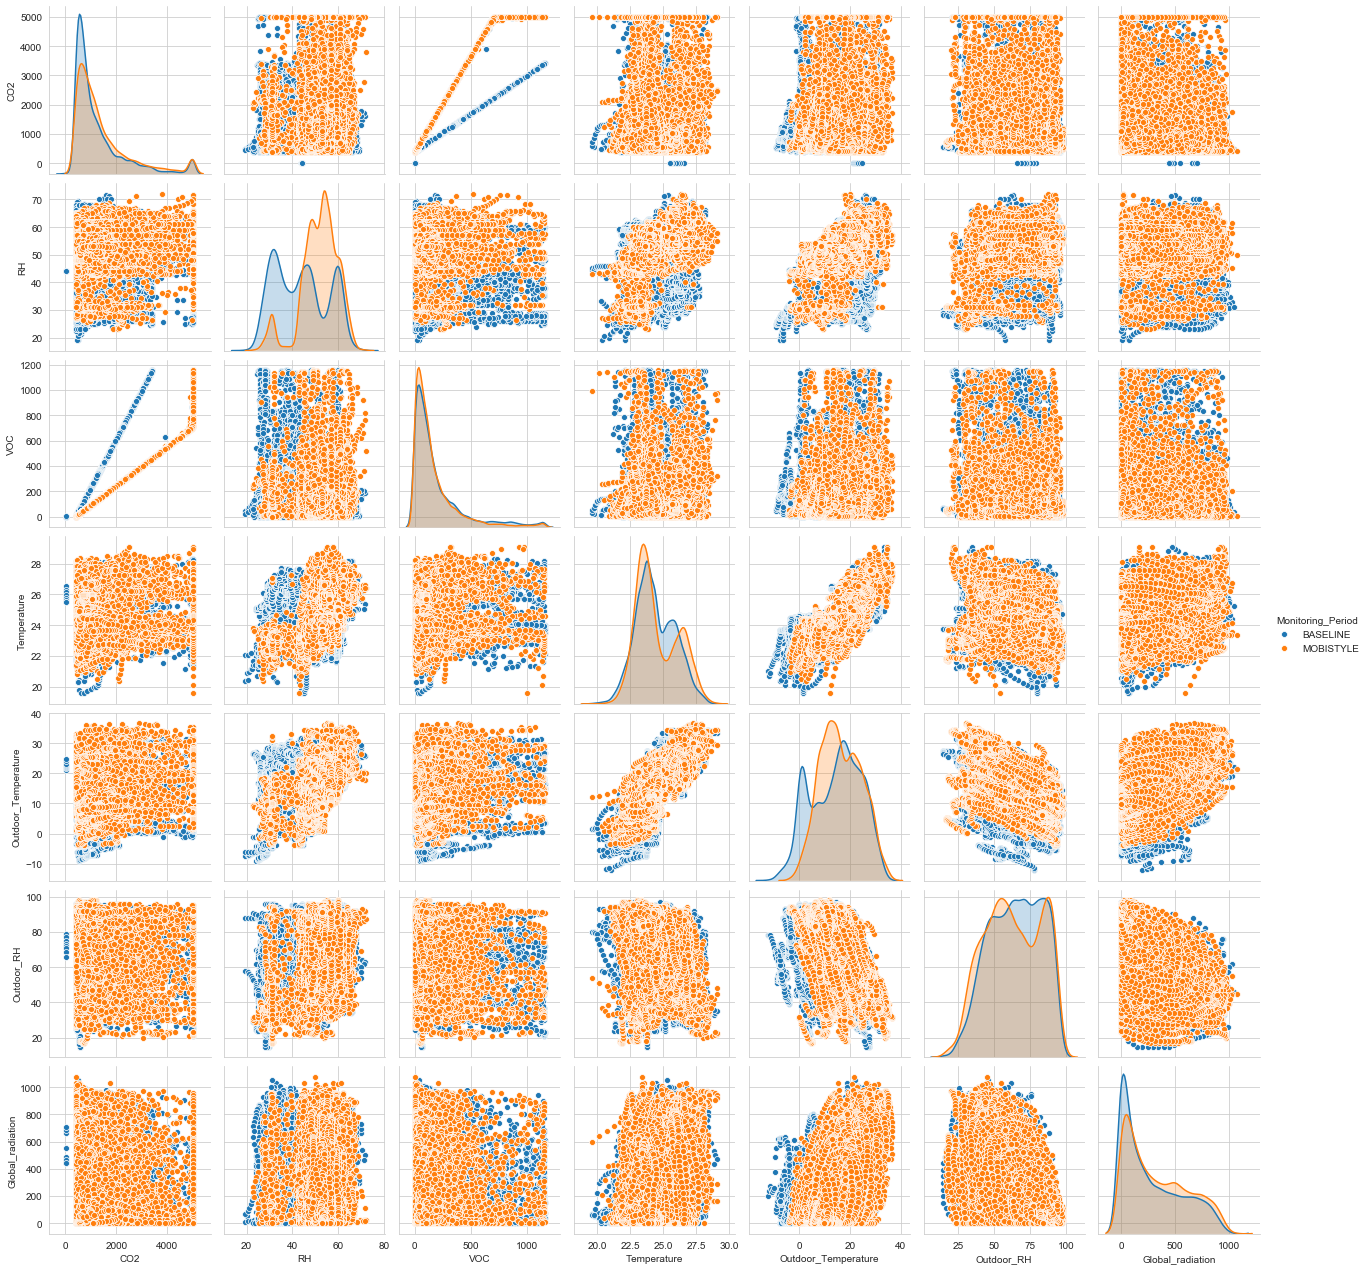

In [25]:
sns.pairplot(data.iloc[:, 3:-1], hue='Monitoring_Period');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As expected the office air temperature has a strong correlation with the outdoor air.
> On the other, hand 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> From correlation matrix it could be seen that some CO2 levels are stronlgy correlated with VOC levels, it means that both parameters are related to the indoor air polution from employees.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

<a id='summary'></a>
# Summary

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!